In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe_cython as lb
from LB_D2Q9 import pipe_opencl as lb_cl

We now want to visualize the evolution of the flow...let's see how it goes...

In [6]:
from IPython import display

It's probably easier to specify dt and dr and the dimensions. Then get everything else from that...yeah. That way the velocity is on the scale of U ~ 0.1 or so.

In [27]:
#### Input to the simulation in SI. ######
diameter = 2. # meters
length = 4. # meters

deltaP = -.01

dr = 0.01
dt = 0.01

viscosity = 10.**-3. # More viscous = easier to simulate!

##### Derived parameters ######
print 'Desired viscosity:' , viscosity
#Re = (input_velocity * diameter)/viscosity
#print 'Desired Re', Re

# Re is set by diameter, input_velocity, and viscosity
# Adjust dr so that mach number doers not explode!
print
print '###### Simulation Parameters #########'
print

# Solve for the desired omega...make sure it's in the correct range.


ly = int(np.ceil(diameter/dr))
lx = int(np.ceil(length/dr))
print 'ly', ly
print 'lx', lx

nx = lx + 1
ny = ly + 1

omega = .5 + (3*dt*viscosity)/(dr**2)

print 'omega:' , omega

assert (omega > 0.5) and (omega < 1)

obstacle_size=.25 # meters

Desired viscosity: 0.001

###### Simulation Parameters #########

ly 200
lx 400
omega: 0.8


In [28]:
nx*ny*9

725409

In [29]:
import skimage as ski
import skimage.draw

In [30]:
import sys

In [31]:
sim = lb_cl.Pipe_Flow(lx=lx, ly=ly, dr=dr, dt=dt, omega=omega,
                  deltaP = deltaP)

The platforms detected are:
---------------------------
Intel(R) OpenCL Intel(R) Corporation version: OpenCL 1.2 LINUX
The devices detected on platform Intel(R) OpenCL are:
---------------------------
       Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz [Type: CPU ]
Maximum clock Frequency: 2000 MHz
Maximum allocable memory size: 2062 MB
Maximum work group size 8192
Maximum work item dimensions 3
Maximum work item size [8192, 8192, 8192]
---------------------------
This context is associated with  1 devices


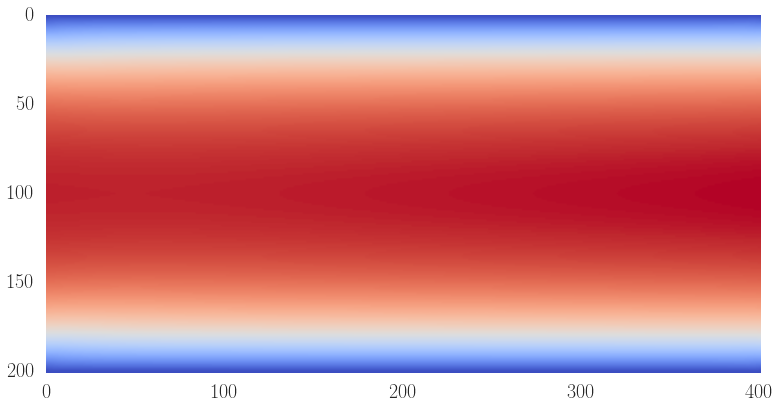

In [34]:
total_num_steps = 5000
steps_per_image= 500

num_to_record = int(np.ceil(float(total_num_steps)/steps_per_image))

plt.figure()
for i in range(num_to_record):
    
    fields = sim.get_fields_on_cpu()
    u = fields['u']
    v = fields['v']
    mag = np.sqrt(u**2 + v**2)
    rho = fields['rho']
    
    print 'max non_dim u:', np.max(u)
    print 'sum of mass' , np.sum(rho)/(sim.nx*sim.ny)
    plt.imshow(mag.T, cmap = cm.coolwarm)
    plt.grid(False)
    #plt.clim(vmin=0, vmax=1.)
    #if i == 0:
    #    plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    sim.run(steps_per_image)
plt.clf() # This way a second figure does not appear at the end...

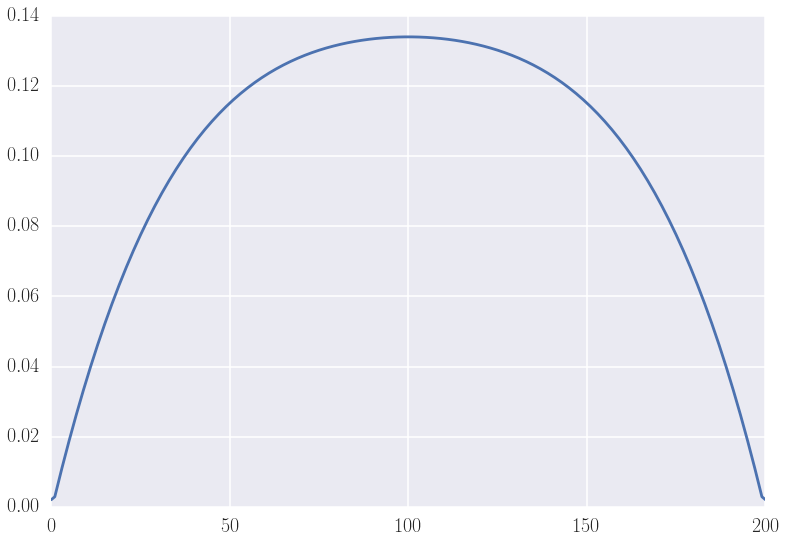

In [35]:
plt.plot(u[300, :])

Ok this looks good. Excellent. Seemed to take a long time to converge...hopefully that's ok. At least we have something working as a baseline.

IDK how to convert...but let's just fit.

In [ ]:
plt.semilogy(Ma_list, ls='-', marker='.')

Nope, it's fucked! lol.

In [ ]:
plt.semilogy(Re_list, ls='-', marker='.')

Looks like it still hasn't converged. But, as expected, larger pressure differences leads to larger reynolds numbers!